In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/2022/heart_2022_with_nans.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


### Values for Each Feature

In [3]:
# for col_name in df.columns:
#     print(col_name)
#     print(np.unique(df[col_name][~pd.isna(df[col_name])]))
#     print()


# Response Variable

Temporarily drop NA

In [4]:
df.dropna(inplace=True)

The response variable HadHeartDisease will combine the HadHeartAttack and HadAngina features where "Yes" indicates the patient had heart disease and "No" indicates the patient did not have heart disease. If either column had "Yes", then HadHeartDisease will also be "Yes", otherwise HadHeartDisease will be "No".

In [5]:
df['HadHeartDisease'] = df.apply(lambda x: 'Yes' if x['HadHeartAttack'] == 'Yes' or x['HadAngina'] == 'Yes' else 'No', axis=1)

Number and percentage of Yes in dataset

In [6]:
np.sum(df['HadHeartDisease'] == 'Yes'), np.mean(df['HadHeartDisease'] == 'Yes')

(21616, 0.08786206111648552)

# Feature Variables

Columns of Interest

In [7]:
cols = [
    'Sex',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'LastCheckupTime',
    'SleepHours',
    'HadStroke',
    'SmokerStatus',
    'ECigaretteUsage',
    'RaceEthnicityCategory',
    'AgeCategory',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HighRiskLastYear',
]

In [8]:
heart_df = df[cols]
heart_df = heart_df.dropna()
heart_df = pd.get_dummies(heart_df)
heart_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Female,Sex_Male,GeneralHealth_Excellent,GeneralHealth_Fair,...,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,HighRiskLastYear_No,HighRiskLastYear_Yes
342,4.0,0.0,9.0,1.60,71.67,27.99,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
343,0.0,0.0,6.0,1.78,95.25,30.13,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
345,0.0,0.0,8.0,1.85,108.86,31.66,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
346,5.0,0.0,9.0,1.70,90.72,31.32,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
347,3.0,15.0,5.0,1.55,79.38,33.07,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,0.0,0.0,6.0,1.78,102.06,32.28,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
445123,0.0,7.0,7.0,1.93,90.72,24.34,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
445124,0.0,15.0,7.0,1.68,83.91,29.86,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
445128,2.0,2.0,7.0,1.70,83.01,28.66,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X = heart_df
y = df['HadHeartDisease'].values

In [20]:
X.shape, y.shape

((246022, 47), (246022,))

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
# rf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=30, max_leaf_nodes=2, max_features='sqrt', class_weight='balanced')
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', class_weight='balanced')

In [56]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 20):
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)

    # Predict on the training set
    train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

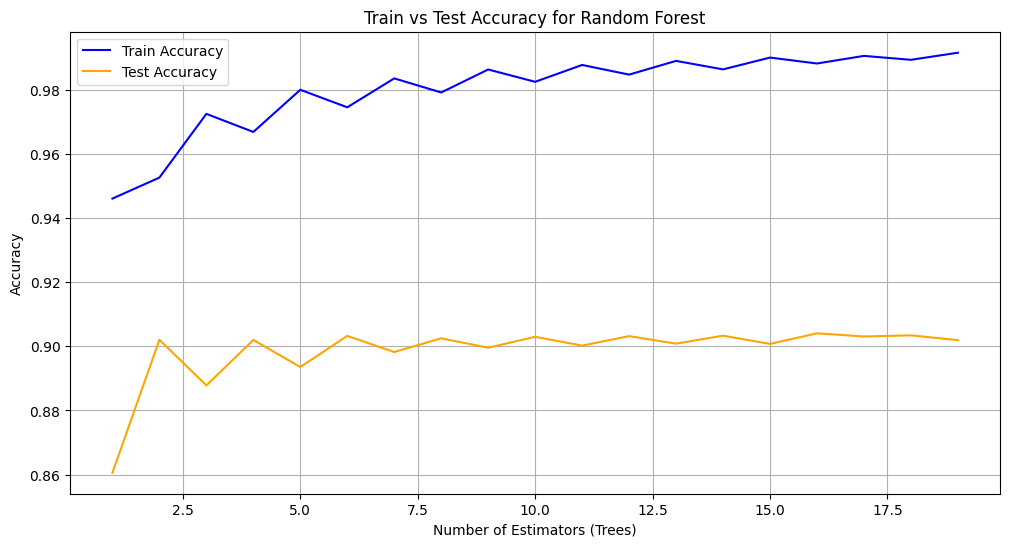

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 20), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [59]:
ypred_rf = rf.predict(X_test)

In [60]:
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95     44947
         Yes       0.32      0.12      0.17      4258

    accuracy                           0.90     49205
   macro avg       0.62      0.55      0.56     49205
weighted avg       0.87      0.90      0.88     49205



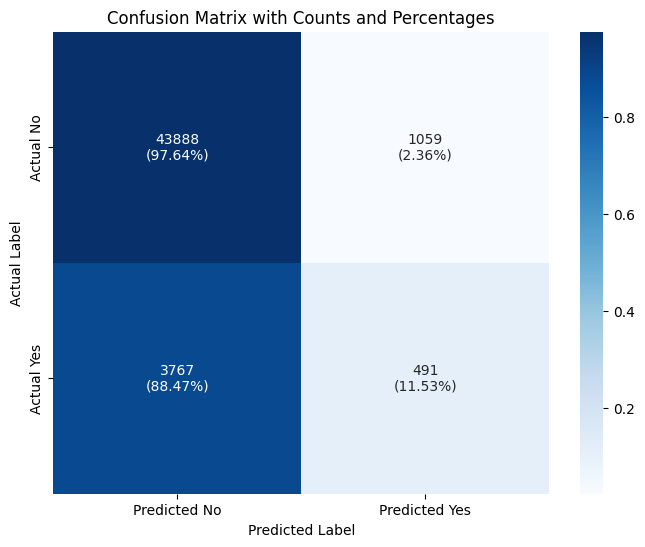

In [61]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [74]:
log_reg = LogisticRegression(random_state=42)

In [78]:
param_grid = {
    'solver': ['liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'max_iter': [100, 500]
}

In [79]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'solver': ['liblinear']})

In [81]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [82]:
ypred_log_reg = best_log_reg.predict(X_test)

In [84]:
print(classification_report(y_test, ypred_log_reg))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     44947
         Yes       0.52      0.07      0.13      4258

    accuracy                           0.91     49205
   macro avg       0.72      0.53      0.54     49205
weighted avg       0.88      0.91      0.88     49205



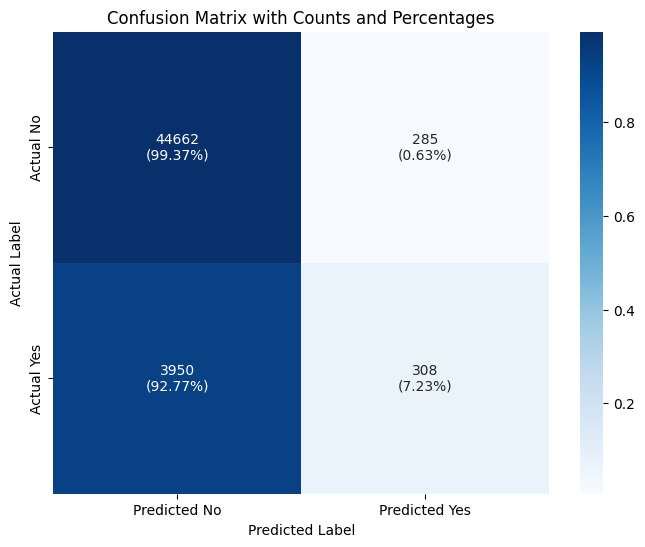

In [83]:
cm = confusion_matrix(y_test, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()